### Logistic Regression

Logistic regression is another linear **classification** method.

The appearance of the word *regression* in the title of this algorithm is confusing (we will say more later). 

### Motivation

Suppose we have some data $X$.  For every ${\bf x}^{(i)} \in X$, ${\bf x}^{(i)}$ is in one of two classes.

Until now we have used $\pm 1$ to represent the two classes in binary classification.

Now we follow the book in switching (for now) to $0$ and $1$. 


The goal of logistic regression is to use the data to learn the function 

$p(y = 1 | { \bf x})$

We regard this as a function with domain $X$ and range $[0,1]$.

If we can learn this function then we can easily do binary classification with the following policy.

```
if p(y = 1 | x) >= 0.5:
    return "x is in class 1"
else:
    return "x is in class 0"
```

### How do we set up the model?

If you want to learn the function $p(y = 1 | \bar{x})$, what do you do?

A natural guess would be to somehow fit ${\bf w}$ so that

$${\bf w}^T{\bf x} \approx p(y=1 | {\bf x})$$

This does not work well, because the functions have different ranges. 

We will have better luck of we can transform ${\bf w}^T{\bf x}$ so that the range becomes $[0,1]$.

One method for doing this is to use the function

$$\phi(z) = \frac{1}{1+e^{-z}}$$

as a "wrapper".



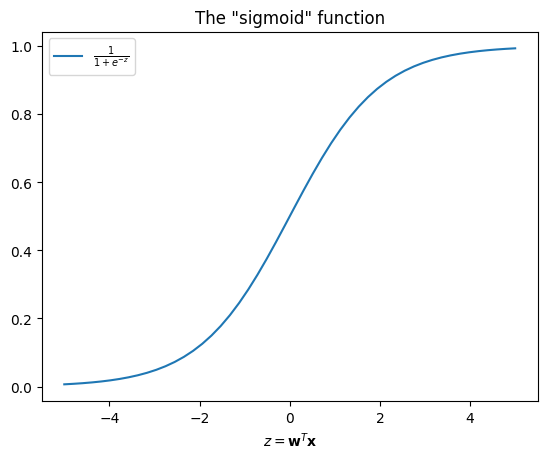

In [2]:
import numpy as np
import matplotlib.pyplot as plt
xaxis = np.linspace(-5,5)
sigmoid = lambda z: 1/(1+np.exp(-z))
curve = sigmoid(xaxis)
plt.plot(xaxis,curve,label=r"$\frac{1}{1+e^{-z}}$")
plt.title('The "sigmoid" function')
plt.xlabel(r"$z = {\bf w}^T{\bf x}$")
plt.legend()
plt.show()


### The model

We now have a sketch of the main plan.

We will fit ${\bf w}$ so that $\phi({\bf w}^T{\bf x}) \approx p(y=1 | {\bf x})$

The way we do this is quite devious.  

Suppose we have some data.

![img](reallynaked.png)

Suppose the labels "+" and "-" are assigned to the points according to some unknown probability distribution $p(y=1 | {\bf x})$.

![img](naked.png)

If we take seriously our hypothesis that $\phi({\bf w}^T{\bf x}) \approx p(y=1 | {\bf x})$, then this distribution is essentially given by ${\bf w}$.

We can now ask the question:  For a fixed ${\bf w}$, how likely is it that the data would be labeled like **this**?

For example, for the ${\bf w}$ shown below, the data would be **unlikely** to be labeled the way it is.

![img](unlikely_data_given_w.png)

Note that if this were the "true" ${\bf w}$, this labeling would not be impossible.  But it would be incredibly unlikely.

On the other hand, for the ${\bf w}$ shown below the labeling seems plausible (even likely).

![img](truew.png)

Here is the main insight that makes logistic regression work:

**For each candidate ${\bf w}$ we can determine the probability of seeing the labels shown given ${\bf w}$ assuming $p(y=1 | {\bf x}) = \phi({\bf w}^T{\bf x})$.**

We can actually write this likelihood down as a function of ${\bf w}$, assuming that the labelings are independent.

$$L({\bf w}) = p({\bf y} | X;{\bf w}) = \prod_{i=1}^n p(y^{(i)} | {\bf x}^{(i)};{\bf w})$$

The way we "fit" ${\bf w}$ to the data is to maximize $L({\bf w})$. 

We now switch to hand written notes, because the notation is getting hairy...





### Logistic Regression with scikit-learn

We will go over the scikit-learn API and explain how to use it to solve a binary classification problem.




In [3]:
import pandas as pd

df = pd.read_csv("wdbc.data",header=None)
X = df.loc[:,2:]
y = df.loc[:,1]
X[:2]


,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train.shape[0],X_test.shape[0]

(426, 143)

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)  ## only fit the training data!
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test) ## use training data stats to transform test set


In [6]:
from sklearn.linear_model import LogisticRegression
#solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default='lbfgs'
model = LogisticRegression()
model.fit(X_train_std,y_train)
print("train accuracy, test accuracy")
model.score(X_train_std,y_train),model.score(X_test_std,y_test)


train accuracy, test accuracy


(0.9906103286384976, 0.972027972027972)

In [7]:
model.predict(X_test_std[3:6])

array(['B', 'M', 'M'], dtype=object)

In [8]:
model.predict_proba(X_test_std[3:6])

array([[9.93497755e-01, 6.50224454e-03],
       [3.07178216e-03, 9.96928218e-01],
       [3.05563050e-08, 9.99999969e-01]])

### Overfitting

Why do we train on one set of data and test on another?

If the objective is to produce the best model, shouldn't it be trained on all the data?

**YES**

*But...*

We also want a good estimate of how the model will perform out of sample.

That is, when we actually use it to make predictions on new data.

We cannot use the same dataset both for fitting the model **and** for estimating its performance.

Why not?

Partly the model has *generalized* the concept that the training data is exhibiting.

But partly the model has just memorized the training data.

Performance on the test set shows just the success we have had generalizing.

Because we will never see the training data again, we do not care about any "skill" that accrues just from memorizing it. 

### Boxplots

In the boxplots below we see, statistically, that some level of overfitting has occurred in training the LR model.


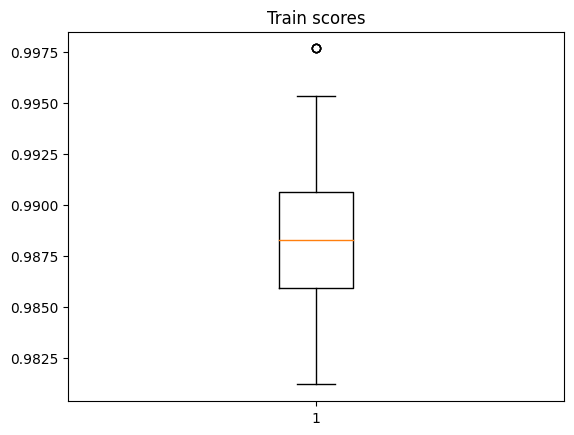

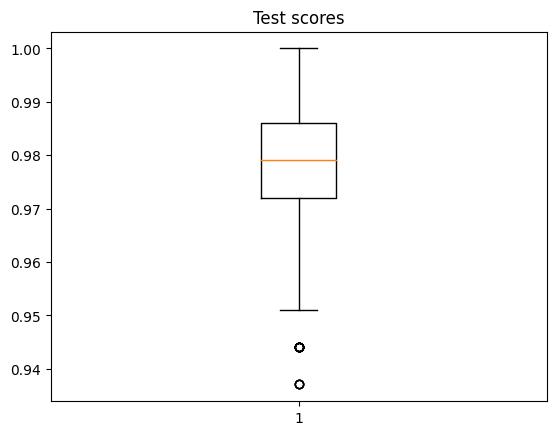

In [9]:
trainscores = []
testscores = []

for _ in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    ss.fit(X_train)
    X_train_std = ss.transform(X_train)
    X_test_std = ss.transform(X_test)
    model.fit(X_train_std,y_train)
    trainscores.append(model.score(X_train_std,y_train))
    testscores.append(model.score(X_test_std,y_test))

plt.title("Train scores")
plt.boxplot(trainscores)
plt.show()
plt.title("Test scores")
plt.boxplot(testscores)
plt.show()



### Regularization

Under the hood, the scikit-learn LR model is actively fighting overfitting using a technique called "regularization".

To see what effect it is having, let's try turning it off by setting `penalty="none"`.

Observe that training accuracy goes way up, but performance on the test set actually drops.

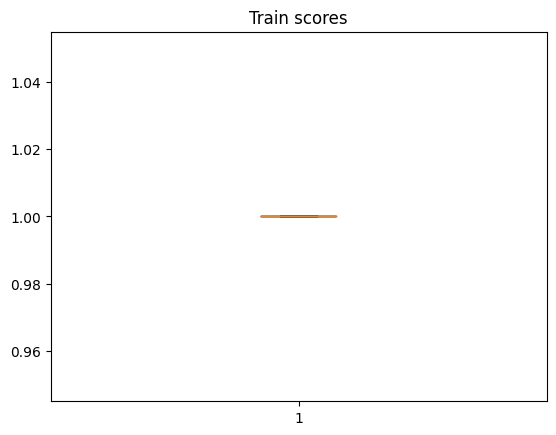

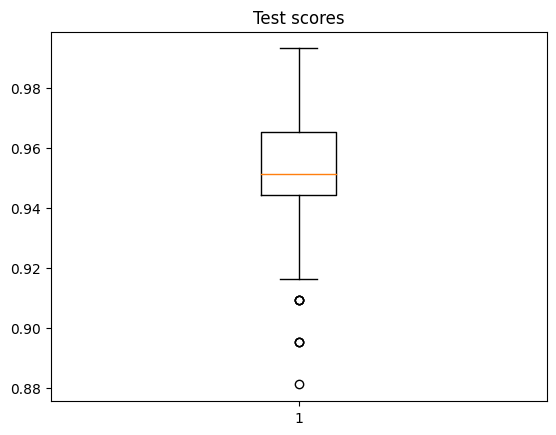

In [10]:
trainscores = []
testscores = []
model = LogisticRegression(penalty="none",max_iter=1000)

for _ in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    ss.fit(X_train)
    X_train_std = ss.transform(X_train)
    X_test_std = ss.transform(X_test)
    model.fit(X_train_std,y_train)
    trainscores.append(model.score(X_train_std,y_train))
    testscores.append(model.score(X_test_std,y_test))

plt.title("Train scores")
plt.boxplot(trainscores)
plt.show()
plt.title("Test scores")
plt.boxplot(testscores)
plt.show()



### Regularization

Under the hood, the scikit-learn LR model is actively fighting overfitting using a technique called "regularization".

This technique (in its simplest form) penalizes large weights.

This form of regularization is called *weight decay*.

When regularization is not used, the optimizer minimizes the cross entropy error that ${\bf w}$ gives on the training data.

$${\bf w}^* = \min_{{\bf w} \in \mathbb{R}^{d+1}} CREE({{\bf w}},X,{\bf y})$$

When regularization **is** used, the optimizer minimizes the error **plus** a complexity penalty $\Omega$ on ${\bf w}$.

$${\bf w}^* = \min_{{\bf w} \in \mathbb{R}^{d+1}} CREE({{\bf w}},X,{\bf y})+\Omega({\bf w})$$

### What is $\Omega$?  

Speaking generally, $\Omega$ can be just about any property of ${\bf w}$.

But in the case of weight decay it usually is either the $l1$ or the square of the $l2$ norm of ${\bf w}$.

$$||{\bf w}||^2_{l2} = \sum_{i=0}^d w_i^2$$

$$||{\bf w}||_{l1} = \sum_{i=0}^d |w_i|$$

So the actual expression minimized by the LR solver (with l2 penalty) is

![img](regerror.png)

Notice that augmenting the error function with the l2 penalty does not really make it harder to compute $\nabla_{\bf w} J$

### What is $\lambda$?

There is a hyperparameter $\lambda$ that lets you "dial in" the right level of regularization for your data.

Confusingly, sklearn does not let you directly set $\lambda$, but rather $C$ as in the expression

$$ \sum_{i=0}^d w_i^2 < C$$

This hard constraint imposed on the cross entropy objective function produces $\lambda$ under the Lagrange multipliers technique.

The important thing to realize is that $C$ is reciprocally proportional to $\lambda$.

Big $C \rightarrow$ **less** regularization.

Small $C \rightarrow$ **more** regularization.


Below we set $C=1000$ which is pretty big.

That means there is relatively little regularization.

Observe how training accuracy $\rightarrow 100$% while test accuracy actually goes down.

This model is **overfitting** the training data.

# Overfitting

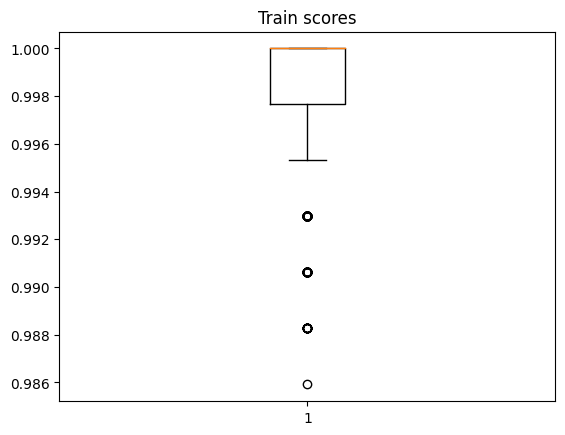

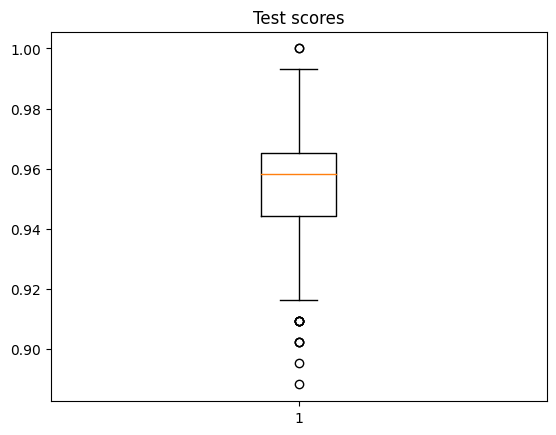

In [13]:
trainscores = []
testscores = []
model = LogisticRegression(penalty="l2",C=1000,max_iter=1000)

for _ in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    ss.fit(X_train)
    X_train_std = ss.transform(X_train)
    X_test_std = ss.transform(X_test)
    model.fit(X_train_std,y_train)
    trainscores.append(model.score(X_train_std,y_train))
    testscores.append(model.score(X_test_std,y_test))

plt.title("Train scores")
plt.boxplot(trainscores)
plt.show()
plt.title("Test scores")
plt.boxplot(testscores)
plt.show()


### Small C

Now we make $C= \frac{1}{1000}$ which is relatively small.  

Note from the definition of $C$ that it must always be positive.

If you want no regularization you have to turn the penalty off as we did before.

Observe now that the performance goes down on **both** the training and test sets, 

**BUT**

the model is not overfitting.

Training performance is roughly equal to test performance.

We call this situation **underfitting**.

# Underfitting

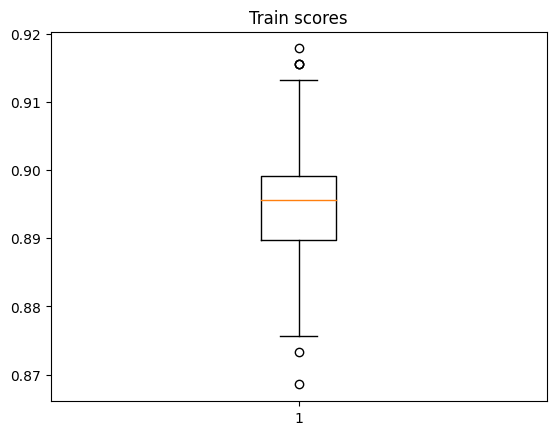

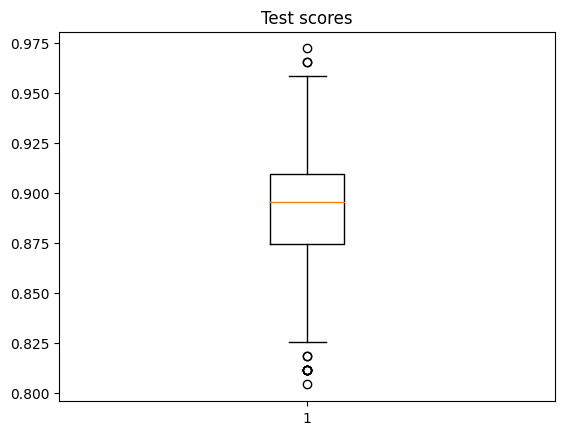

In [12]:
trainscores = []
testscores = []
model = LogisticRegression(C=1/1000)

for _ in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    ss.fit(X_train)
    X_train_std = ss.transform(X_train)
    X_test_std = ss.transform(X_test)
    model.fit(X_train_std,y_train)
    trainscores.append(model.score(X_train_std,y_train))
    testscores.append(model.score(X_test_std,y_test))

plt.title("Train scores")
plt.boxplot(trainscores)
plt.show()
plt.title("Test scores")
plt.boxplot(testscores)
plt.show()


### Bias and Variance

Overfitting and underfitting can be expressed in terms of "bias" and "variance".

Both of these concepts make use of the idea of an "average" model.

The average is taken over all the possile training sets.

**bias** is error that results from the average model being very different from the true target function

**variance** is the error that results from sensitive dependence of the final predictor on the training set

In pictures we usually draw something like this:

![img](biasVariance.png)

or this

![img](targets.png)


And, formally, what we are saying is this:


![img](biasVarEqn.png)

All of this is discussed in detail here:

[https://en.wikipedia.org/wiki/Bias–variance_tradeoff](https://en.wikipedia.org/wiki/Bias–variance_tradeoff)
